# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

The 'medv' variable represents the median value of owner-occupied homes in $1000s. The 'dis' variable represents the weighted distances to five Boston employment centers.

_(ii)_ What concept ‘defines’ the plotted line?

Linear regression model that predicts the 'medv' values based on the 'dis' values.

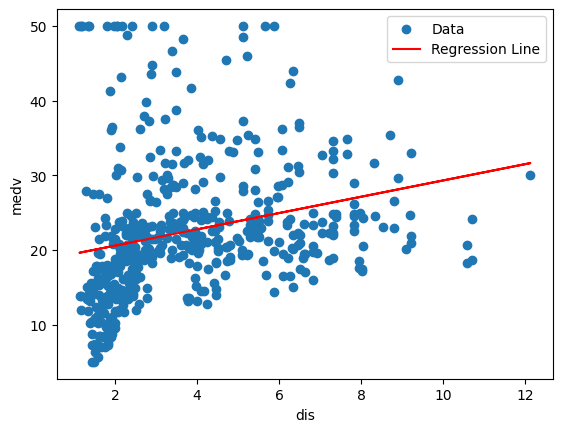

In [3]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

The null hypothesis - there is no linear relationship between 'dis' and 'medv'. Alternative hypothesis - there is a linear relationship between 'dis' and 'medv'.

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [4]:
# Add a constant to the predictor variable matrix (for the intercept term)
X = sm.add_constant(dis)

# Fit the regression model
model = sm.OLS(medv, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        23:50:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
The intercept (𝛽0) is 18.3901. The coefficient for DIS (𝛽1) is 1.0916

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
𝐵0 = 0.817 𝐵1 = 0.188 

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
𝐵0 = [16.784, 19.996] 𝐵1 = [0.722, 1.462]

In [5]:
confidence_intervals = results.conf_int()
print(confidence_intervals)

[[16.78417945 19.99599722]
 [ 0.72150933  1.4617167 ]]



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
No. R2 value of 0.062 shows that the model does not explain much of the variability in the median home value

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  
Yes, we reject the null hypothesis H0:B1 = 0 because the p-value (0.000) is less than 0.05, indicating a statistically significant relationship between dis and medv.

In [6]:
# Print the R-squared value
r_squared = results.rsquared
print("R-squared value:", r_squared)

# Print the F-statistic and its p-value
f_statistic = results.fvalue
f_pvalue = results.f_pvalue
print("F-statistic:", f_statistic)
print("P-value of the F-statistic:", f_pvalue)

R-squared value: 0.062464372121782574
F-statistic: 33.57957032590534
P-value of the F-statistic: 1.2066117273372497e-08


### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [7]:
# Extracting the relevant variables from the dataset
medv = Boston['medv']
dis = Boston['dis']
rm = Boston['rm']

# Creating a DataFrame with the predictor variables
X = pd.DataFrame({'dis': dis, 'rm': rm})
X = sm.add_constant(X)  # Adding a constant to the predictor variables matrix

# Fitting the OLS regression model with medv as the response variable and dis, rm as predictor variables
model = sm.OLS(medv, X)
results = model.fit()

# Printing the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        23:53:04   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

The null hypothesis is that neither “dis” nor “rm” has a significant effect on “medv”. the alternative hypothesis is that at least one of the predictor variables ('dis' or 'rm') has a significant effect on 'medv'.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

The p-value for dis is 0.001, which is less than 0.05, indicating that dis is a statistically significant predictor at the medium level. The p-value for rm is 0.000, also less than 0.05, indicating that rm is also a statistically significant predictor of medium lesion. In addition, the R2 value is 0.496, which means that 49.6% of the variance in medv is explained by the predictors dis and rm.

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

Outliers can significantly affect the validity and reliability of a regression model. To ensure model accuracy and generalizability, outliers must be properly identified and removed using methods such as data transformation, outlier removal, or robust regression techniques.

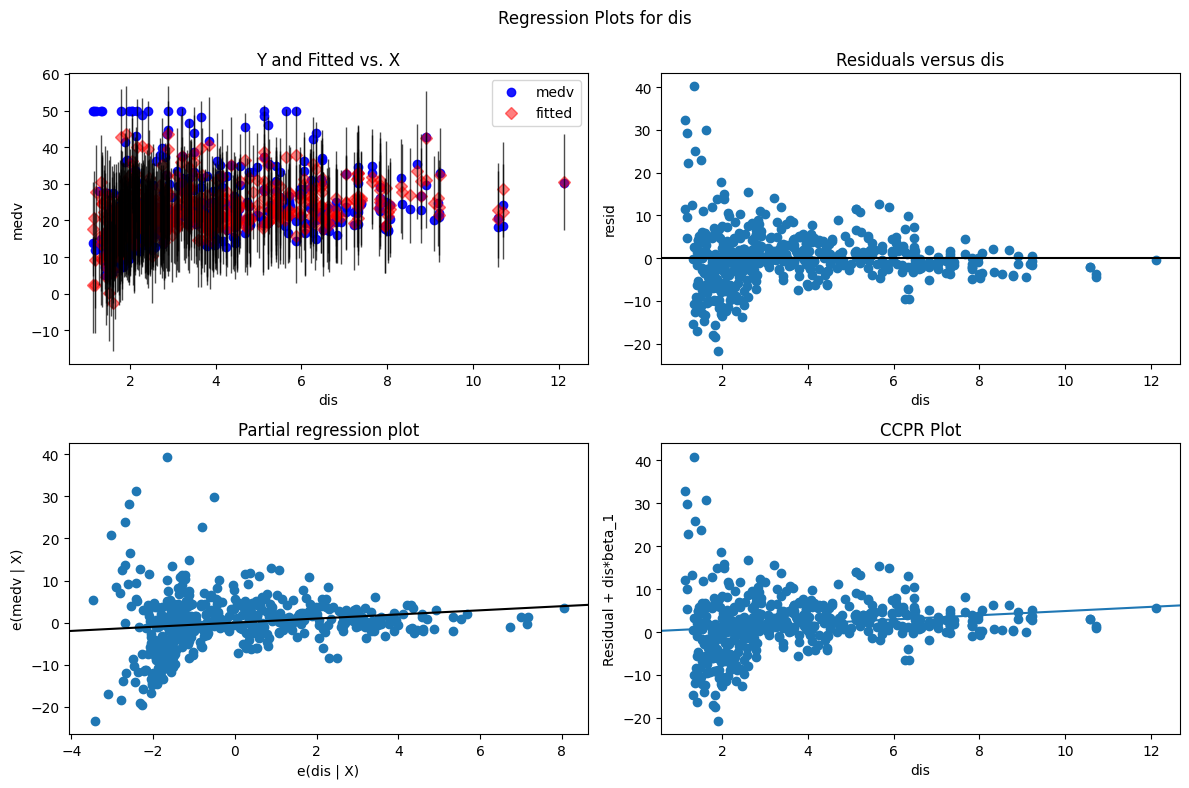

In [8]:
sm.graphics.plot_regress_exog(results, 'dis', fig=plt.figure(figsize=(12, 8)))
plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [9]:
# Define predictor interaction as the product of 'dis' and 'rm'
x1 = dis
x2 = rm
interaction = x1  * x2

# Use Boston dataset to create a DataFrame with predictor variables 'dis', 'rm', and 'interaction'
X_interact = pd.DataFrame({'x1': x1, 'x2': x2, 'interaction': interaction}) 

# Add constant term to the predictor variables DataFrame
X_interact = sm.add_constant(X_interact)

# Fit the multiple linear regression model using OLS (Ordinary Least Squares) method
model_interact = sm.OLS(medv, X_interact) 
results_interact = model_interact.fit()

# Print summary of regression results
print(results_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        23:54:17   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -15.2533      4.895     -3.116      

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
